# 1. TF-IDF(단어 빈도-역 문서 빈도)
TF-IDF : 단어의 빈도와 역 문서 빈도(문서의 빈도에 측정 식을 취함)을 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법
→ 문서의 유사도, 검색 시스템에서 검색 결과의 중요도, 문서 내에서 특정 단어의 중요도 구하는 작업에 사용

문서 : d, 단어 : t, 문서의 총 개수 : n

#### (1) tf(d, t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수
#### (2) df(t) : 특정 단어 t가 등장하는 문서의 수
#### (3) idf(d, t) : df(t)에 반비례하는 수 
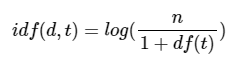

# 2. 파이썬으로 TF-IDF 직접 구현하기

In [1]:
import pandas as pd
from math import log

docs=['먹고 싶은 사과',
      '먹고 싶은 바나나',
      '길고 노란 바나나 바나나',
      '저는 과일이 좋아요']
vocab=list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [16]:
N=len(docs)

def tf(d, t):
    return d.count(t)

def idf(t):
    df=0
    for doc in docs:
        if t in doc:
            df+=1
    return log(N/(df+1))

def tfidf(d, t):
    return tf(d, t)*idf(t)

In [3]:
result1=[]

for i in range(N):
    result1.append([])
    d=docs[i]
    for j in range(len(vocab)):
        t=vocab[j]
        result1[-1].append(tf(d, t))
        
DTM=pd.DataFrame(result1, columns=vocab)

In [4]:
DTM

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [5]:
result2=[]
for i in range(len(vocab)):
    result2.append(idf(vocab[i]))

idf=pd.DataFrame(result2, index=vocab, columns=['IDF'])
idf

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [17]:
result=[]
for i in range(N):
    result.append([])
    d=docs[i]
    for j in range(len(vocab)):
        t=vocab[j]
        (result[-1]).append(tfidf(d, t))

tfidf=pd.DataFrame(result, columns=vocab)
tfidf

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


주의할 점  
전체 문서의 수=4, df(t)=3 → idf(t)=0
→ 가중치의 역할 수행 불가능 :  사이킷런의 TF-IDF, 구현체는 조정된 식 사용

# 3. 사이킷런을 이용한 DTM과 TF-IDF 실습

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

corpus=['you know I want your love',
        'I like you',
        'what should I do ',    
]

vector=CountVectorizer()

print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus=[
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

tfidfv=TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}
